In [1]:
import pandas as pd

filename="results_integration_scheduling"

df_integration = pd.read_csv(filename + ".txt", sep=" ", header=None, names=["Programa", "Threads", "Tamaño entrada 1", "Tipo scheduling", "Tamaño chunk", "Tiempo de ejecución"])
df_integration = df_integration.drop("Programa", 1)
df_integration

,Threads,Tamaño entrada 1,Tipo scheduling,Tamaño chunk,Tiempo de ejecución
0,1,100000,1,10,0.000
1,1,100000,1,50,0.000
2,1,100000,1,100,0.000
3,1,100000,1,500,0.001
4,1,100000,1,1000,0.001
...,...,...,...,...,...
119995,50,100000000,2,50,0.224
119996,50,100000000,2,100,0.210
119997,50,100000000,2,500,0.185
119998,50,100000000,2,1000,0.176


In [2]:
df_integration = df_integration.groupby(["Threads", "Tamaño entrada 1", "Tipo scheduling", "Tamaño chunk"]).describe()
df_integration = df_integration[[("Tiempo de ejecución",  "mean"), ("Tiempo de ejecución",  "std")]]
df_integration = df_integration.rename(columns={"mean": "Promedio", "std": "Desvío estándar"})
df_integration

Tiempo de ejecución  \
                                                                 Promedio   
Threads Tamaño entrada 1 Tipo scheduling Tamaño chunk                       
1       100000           1               10                       0.00062   
                                         50                       0.00084   
                                         100                      0.00070   
                                         500                      0.00054   
                                         1000                     0.00066   
...                                                                   ...   
50      100000000        2               50                       0.22438   
                                         100                      0.20026   
                                         500                      0.18454   
                                         1000                     0.18168   
                                         5000                     0.17886   

                                                                       
                                                      Desvío estándar  
Threads Tamaño entrada 1 Tipo scheduling Tamaño chunk                  
1       100000           1               10                  0.000567  
                                         50                  0.000584  
                                         100                 0.000580  
                                         500                 0.000579  
                                         1000                0.000626  
...                                                               ...  
50      100000000        2               50                  0.003030  
                                         100                 0.007420  
                                         500                 0.004643  
                                         1000                0.004727  
                                         5000                0.003796  

[2400 rows x 2 columns]

In [3]:
df_integration.columns = [" - ".join(a) for a in df_integration.columns.to_flat_index()]
df_integration = df_integration.reset_index()

In [4]:
df_integration_filtered = df_integration[((df_integration["Threads"] & df_integration["Threads"] - 1) == 0)]
df_integration_filtered["Tipo scheduling"] =  df_integration_filtered['Tipo scheduling'].replace({1: 'Estático', 2: 'Dinámico'})
df_integration_filtered["Scheduling"] = df_integration_filtered["Tipo scheduling"].astype(str) + " - " + df_integration_filtered["Tamaño chunk"].astype(str)

<ipython-input-4-176b3384ddaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integration_filtered["Tipo scheduling"] =  df_integration_filtered['Tipo scheduling'].replace({1: 'Estático', 2: 'Dinámico'})
<ipython-input-4-176b3384ddaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integration_filtered["Scheduling"] = df_integration_filtered["Tipo scheduling"].astype(str) + " - " + df_integration_filtered["Tamaño chunk"].astype(str)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Estático - 10'),
  Text(1, 0, 'Estático - 50'),
  Text(2, 0, 'Estático - 100'),
  Text(3, 0, 'Estático - 500'),
  Text(4, 0, 'Estático - 1000'),
  Text(5, 0, 'Estático - 5000'),
  Text(6, 0, 'Dinámico - 10'),
  Text(7, 0, 'Dinámico - 50'),
  Text(8, 0, 'Dinámico - 100'),
  Text(9, 0, 'Dinámico - 500'),
  Text(10, 0, 'Dinámico - 1000'),
  Text(11, 0, 'Dinámico - 5000')])

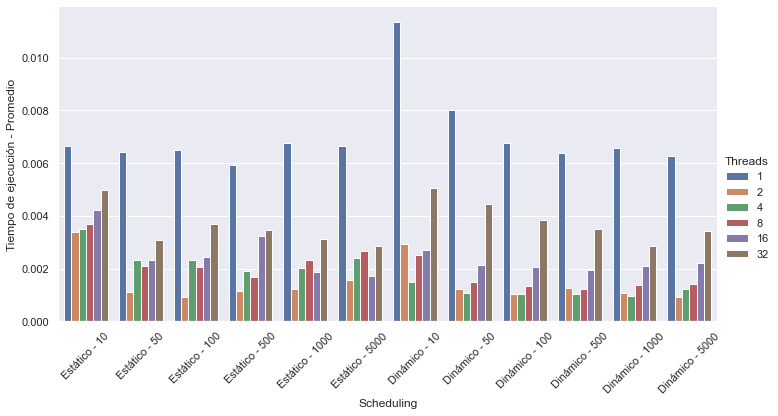

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(18, 18)})

sns.catplot(height=5, aspect=2, x='Scheduling', y='Tiempo de ejecución - Promedio', hue='Threads', data=df_integration_filtered[(df_integration_filtered["Tamaño entrada 1"] == 1000000)], kind='bar', ci=None)
plt.xticks(rotation=45)

In [6]:
df_integration.to_excel(filename + ".xlsx")